# <center> TP 2 : Les methodes de régression et classification

Dans ce TP, vous allez découvrir le fonctionnement d'un arbre de décision, aussi que de la méthode KNN etc., dans les tâches de régression et classification sur les données synthétiques et MNIST.

**Votre travail consiste à écrire du code et effectuer des calculs dans les cellules ci-dessous.**

In this lab, you will discover how a decision tree works, as well as the KNN method etc., in regression and classification tasks on synthetic and MNIST data.

**Your job is to write code and perform calculations in the cells below.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les bibliothèques nécessaires

First, we will initialize the environment, import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()

from IPython.display import Image
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

## 1. Arbres de décision et KNN methode pour la régression : données synthétiques

## 1. Decision trees and KNN method for regression: synthetic data

Considérons le problème de régression unidimensionnel suivant. Nous devons créer une fonction $\large a(x)$ pour approximer la dépendance $\large y = f(x) = x^3 $ en utilisant le critère d'erreur quadratique moyen: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

Consider the following one-dimensional regression problem. We need to create a function $\large a(x)$ to approximate the dependence $\large y = f(x) = x^3 $ using the mean squared error criterion: $\large \min \sum_i {( a(x_i) - f(x_i))}^2$.

Créons une fonction de génération des données (sur l'intervalle [-3,3]) avec le bruit normal de 40% pour ce problème.

Let's create a data generation function (over the interval [-3.3]) with the normal noise of 40% for this problem.

In [2]:
n_train = 100        
n_test = 100     
noise = 0.4

def generate(n_samples, noise):
    X = np.linspace(-3,3,n_samples)
    y = X ** 3 + np.random.normal(0.0, noise, n_samples) 
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

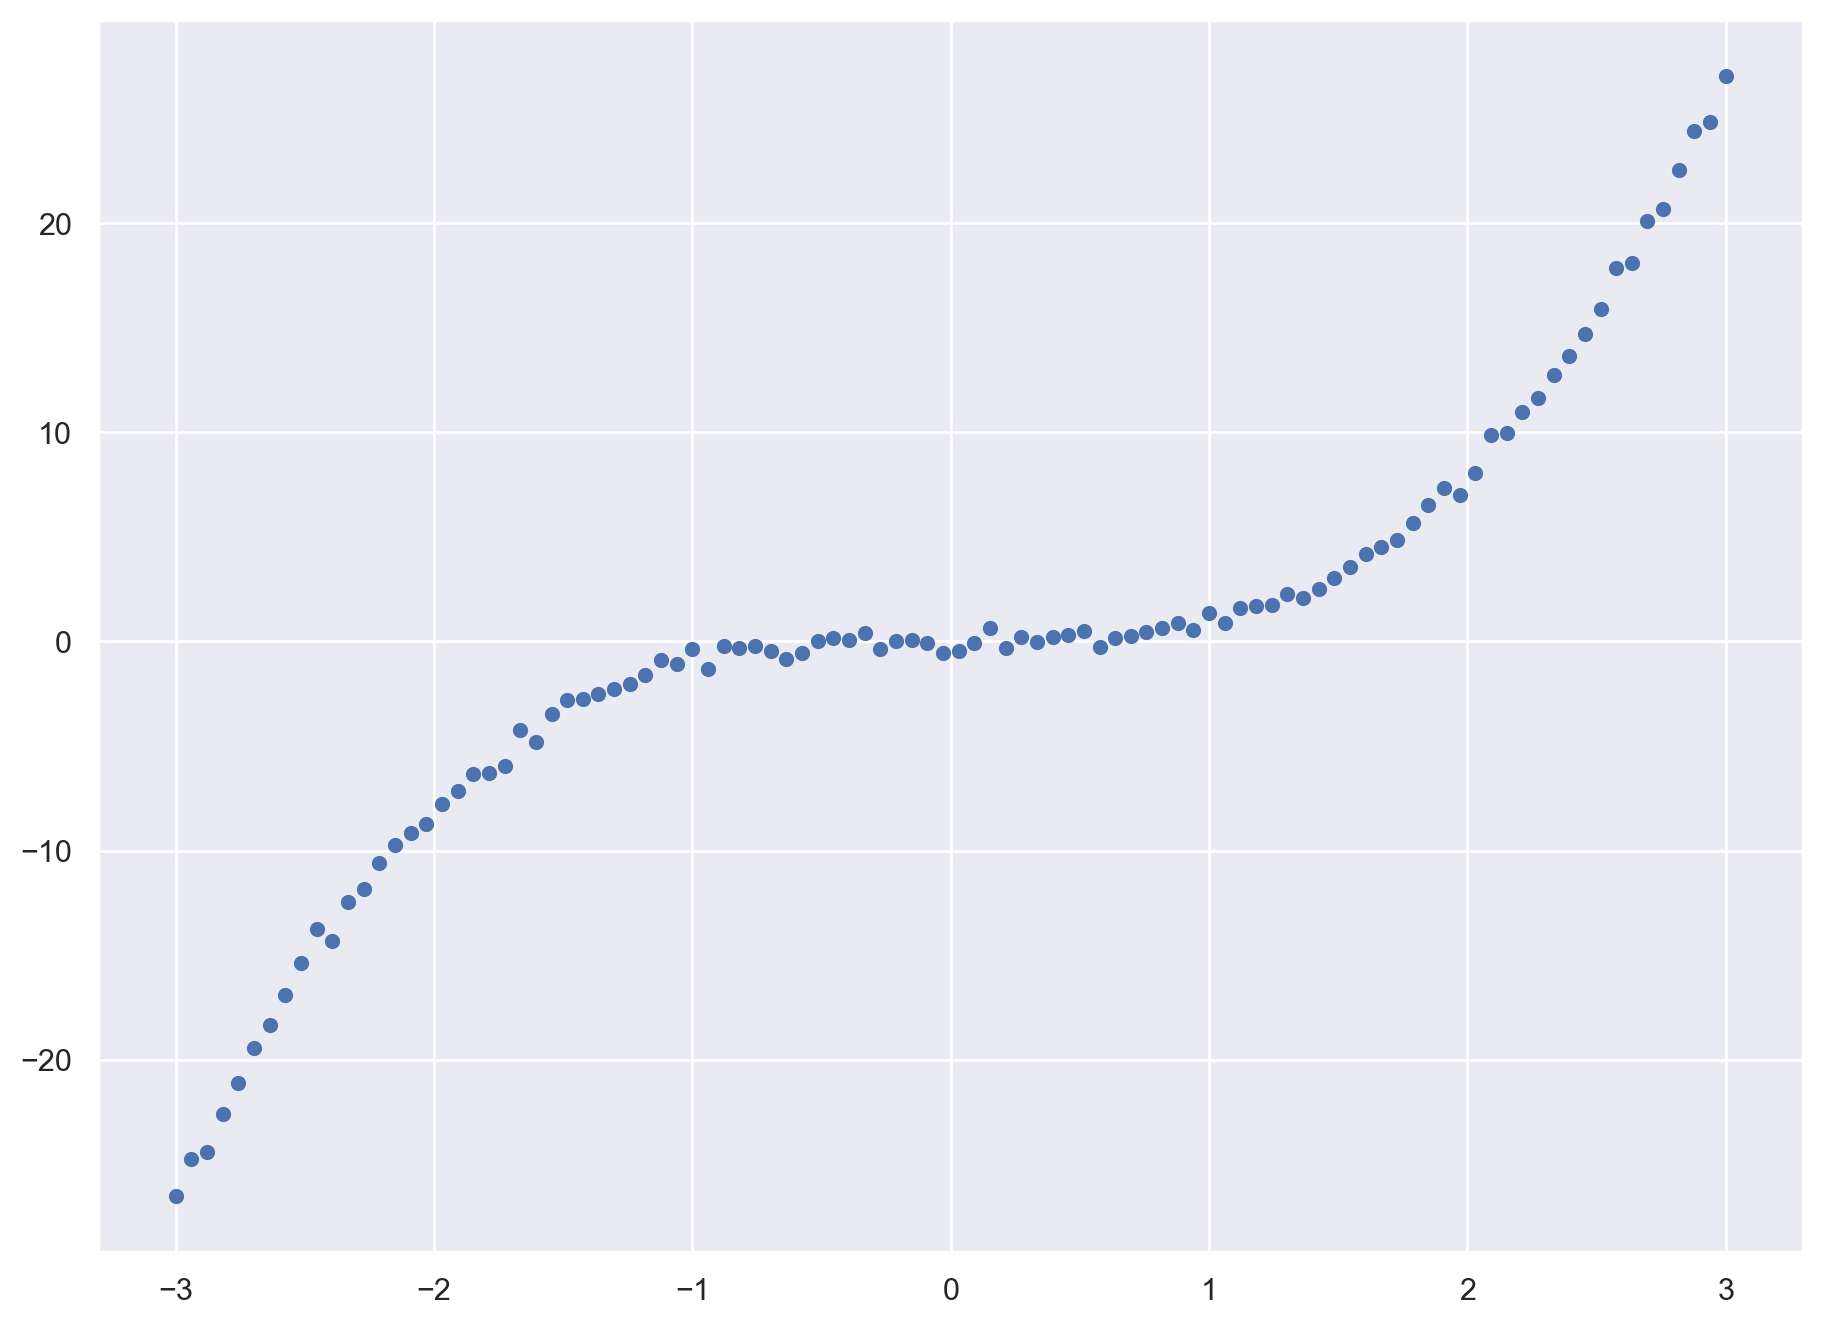

In [3]:
plt.scatter(X_train, y_train, c="b", s=20)
plt.show()

**Ex. 1** : Créez un arbre de decision de la classe [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), entraînez le sur données {X_train, y_train} et visualisez les prédictions qu’il réalise. Affichez votre l'erreur quadratique moyenne (MSE) obtenue sur les données de test {X_test, y_test}.

**Ex. 1**: Create a decision tree of the class [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), train it on data {X_train, y_train} and view the predictions it makes. Display your mean squared error (MSE) obtained on the test data {X_test, y_test}.

In [4]:
from sklearn.tree import DecisionTreeRegressor

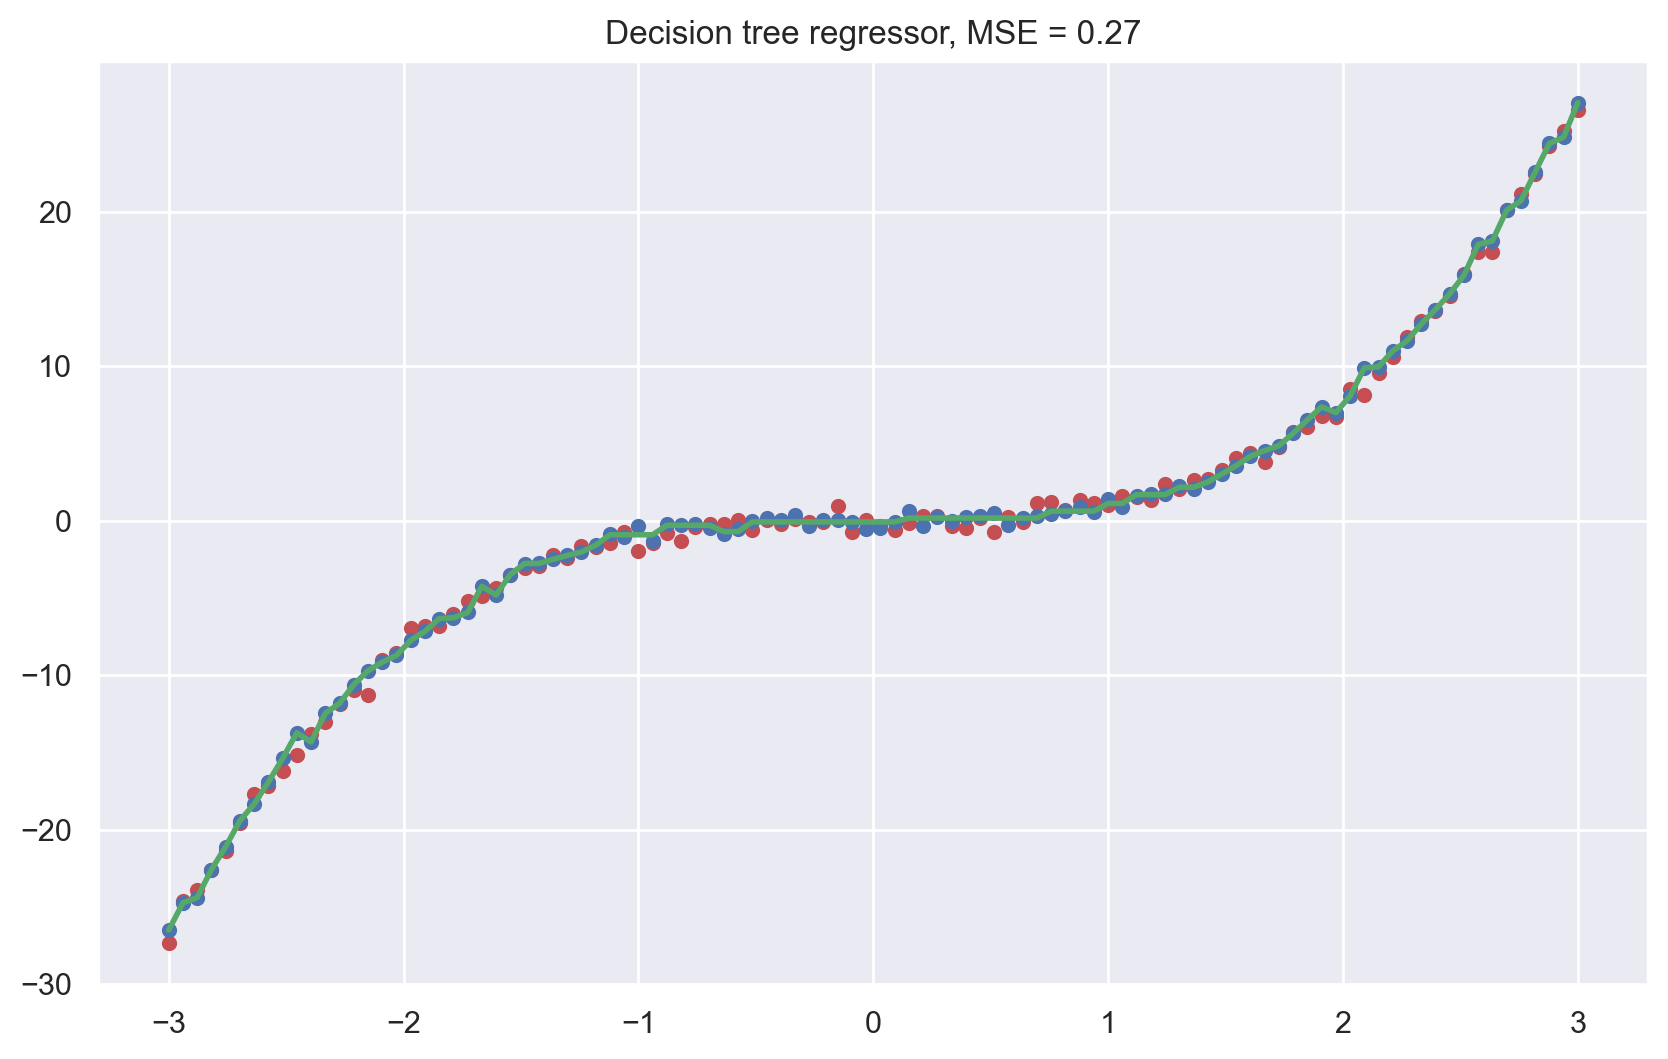

In [5]:
reg_tree = DecisionTreeRegressor(max_depth=7, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

### Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c="r", s=20)
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)

plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

**Ex. 2** : Appliquez la méthode des plus proches voisins (KNN) de la classe [`sklearn.neighbors.KNeighborsRegressor`]( https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) à ce problème de régression, entraînez le sur données {X_train, y_train} et visualisez les prédictions qu’il réalise. Affichez votre l'erreur quadratique moyenne (MSE) obtenue sur les données de test {X_test, y_test}.

**Ex. 2**: Apply the nearest neighbors (KNN) method of the class [`sklearn.neighbors.KNeighborsRegressor`]( https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html ) to this regression problem, train it on data {X_train, y_train} and visualize the predictions it makes. Display your mean squared error (MSE) obtained on the test data {X_test, y_test}.

In [6]:
from sklearn.neighbors import KNeighborsRegressor 

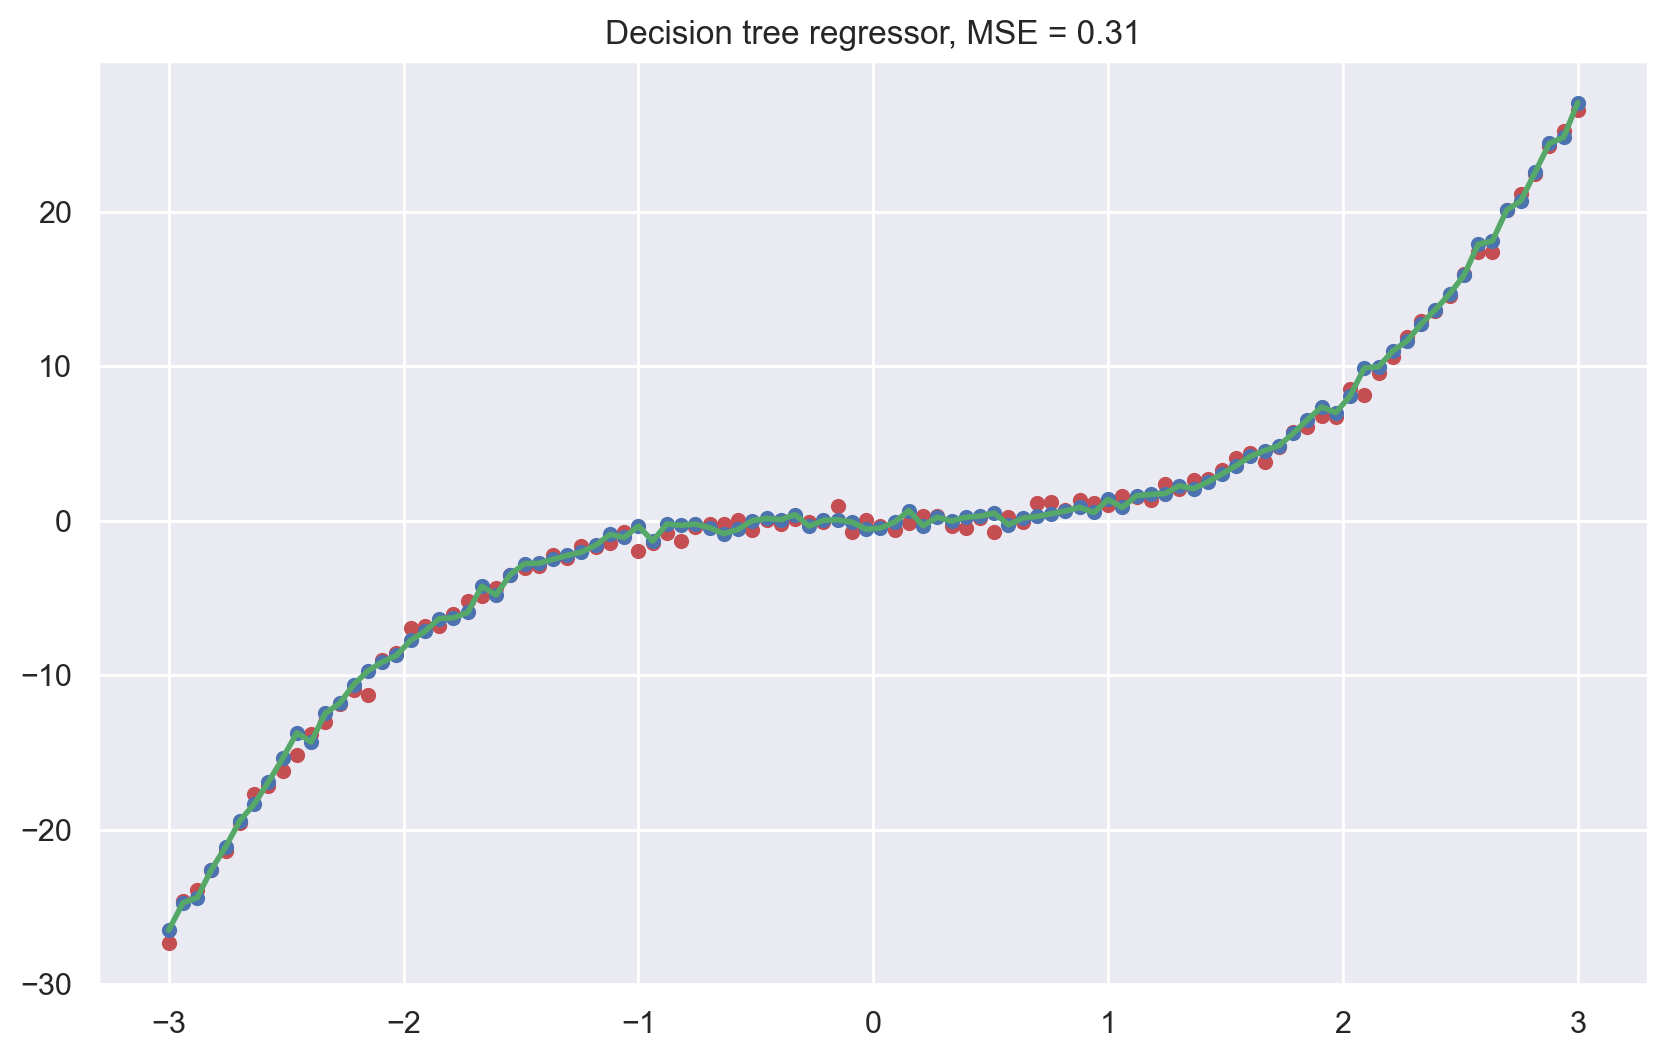

In [7]:
reg_knn = KNeighborsRegressor(n_neighbors=1)

reg_knn.fit(X_train, y_train)
reg_knn_pred = reg_knn.predict(X_test)

### Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c="r", s=20)
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_knn_pred, "g", lw=2)

plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_knn_pred) ** 2) / n_test))
plt.show()

## 2. Arbres de décision, k-NN et Forêt aléatoire dans une tâche de reconnaissance manuscrite de chiffres du MNIST

## 2. Decision Trees, k-NN and Random Forest in a Handwritten Digit Recognition Task from MNIST

Voyons maintenant comment ces 3 algorithmes fonctionnent sur une tâche tirée du monde réel. Nous allons utiliser le jeu de données intégré dans `sklearn` sur des chiffres manuscrits. Cette tâche est un exemple où k-NN fonctionne étonnamment bien.
 
Les images sont des matrices 8x8 (intensité de la couleur blanche pour chaque pixel). Ensuite, chacune de ces matrices est "unfolded" (étalée, dépliée) en un vecteur de longueur 64 et nous obtenons une description des caractéristiques d'un objet.
 
Affichons quelques chiffres manuscrits. Nous voyons que l'on peut les distinguer.

Now let's see how these 3 algorithms work on a task taken from the real world. We will use the built-in dataset in `sklearn` on handwritten numbers. This task is an example where k-NN works surprisingly well.

The images are 8x8 matrices (white color intensity for each pixel). Then each of these matrices is "unfolded" into a vector of length 64 and we get a description of the characteristics of an object.

Let's display some handwritten numbers. We see that they can be distinguished.

In [8]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

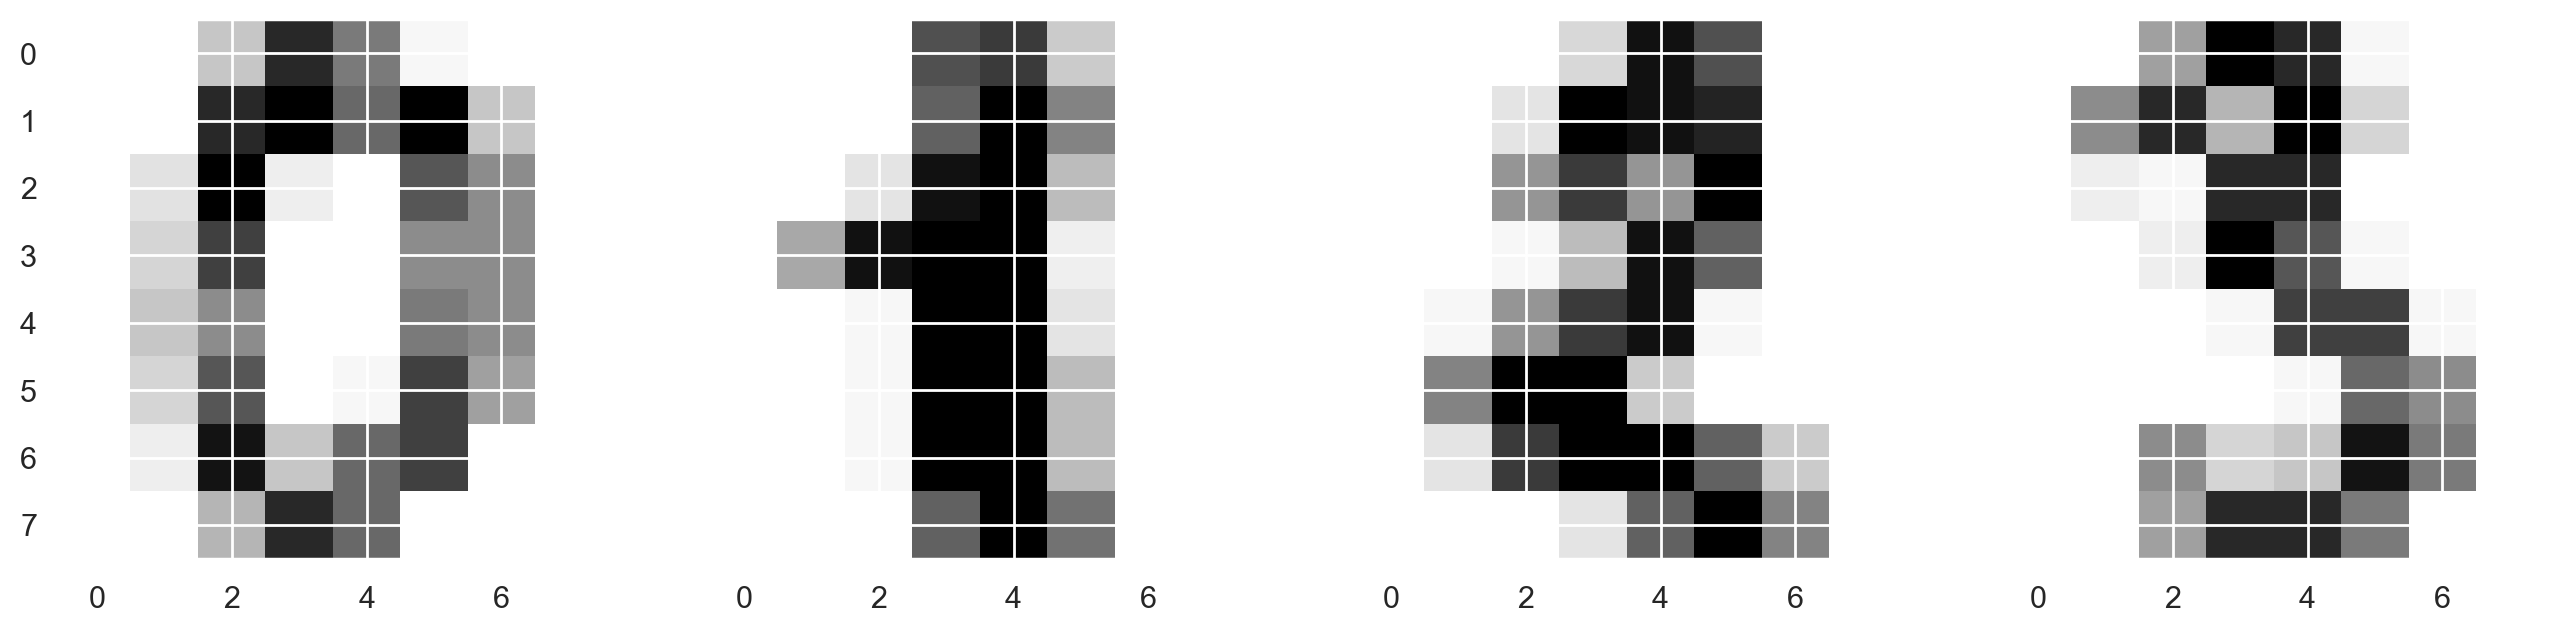

In [9]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

**Ex. 3** : Séparez les données MNIST en *train* (70%) et *test* (30%) sous-ensemble des données (en utilisant [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

**Ex. 3**: Split MNIST data into *train* (70%) and *test* (30%) data subset (using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [10]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

**Ex. 4,5,6** : Appliquez les Arbres de décision ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)), k-NN ([`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) et Forêt aléatoire ([`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) avec les paramètres par défaut sur les données MNIST séparées. 

Affichez les résultats obtenus sur les données de *test*.

**Ex. 4,5,6**: Apply Decision Trees ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)), k-NN ([`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) and Random Forest ([`sklearn.ensemble.RandomForestClassifier `](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) with default settings on separate MNIST data.

Display the results obtained on the *test* data.

**Ex. 4**

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.85

**Ex. 5**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()
# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)

0.9833333333333333

**Ex. 6**

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
forest_pred = forest.predict(X_holdout)
accuracy_score(y_holdout, forest_pred)

0.9592592592592593

**Ex. 7,8,9** : Optimisez les paramètres des 3 méthodes en utilisant la validation croisée (sur les données de *train*), [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

Affichez les résultats obtenus sur les données de *test*.

**Ex. 7,8,9**: Optimize parameters of 3 methods using cross-validation (on *train* data), [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Display the results obtained on the *test* data.

**Ex. 7**

In [20]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [21]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8496585088218553)

In [22]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8425925925925926

**Ex. 8**

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_grid = GridSearchCV(knn_pipe, knn_params, 
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [25]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, 0.9689812179852021)

In [26]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout_scaled))

0.9703703703703703

**Ex. 9**

In [27]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(6, 12),
                         'max_features': range(4, 19)},
             verbose=True)

In [28]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 9, 'max_features': 7}, 0.9777366723581864)

In [29]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.9648148148148148

**Ex. 10** : Organisez les résultats obtenus dans les ex.8-9 sous forme d'un tableau (lignes : DT, KNN, RF; colonnes : Holdout, CV).

**Ex. 10**: Organize the results obtained in ex.8-9 in the form of a table (rows: DT, KNN, RF; columns: Holdout, CV).

|   algo\eval      |   CV  | Holdout |  
|---------|-------|---------|
| **DT**  | 0.8496585088218553   | 0.8425925925925926     | 
| **kNN** | 0.8496585088218553   | 0.9703703703703703    |
| **RF**  | 0.9777366723581864   | 0.9648148148148148    | 
